# Project: Health care spending impacts on life expectancy

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Data on average life expectancy, inflation adjusted income per person per GDP, total health care spending and private health care spending was obtained from gapminder.org. This data is broken down by country and year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Life expectancy is available through 2018 but health care spending data is only available through 2010. Therefore this analysis will focus on data for 2010.

### Data set descriptions:
- Life expectancy is the median number of years to live based on current mortality trends.
- Income per person is the gross domestic product per person adjusted for differences in purchasing power as well as inflation.
- Total health care spending is the total sum of private and public expenditure as a percentage of gross domestic product.
- Private health care spending is the percentage of total health expenditure paid by private entities such as commercial insurance or the consumer.

In [2]:
# Load the life expectancy data
life_expectancy = pd.read_csv('life_expectancy_years.csv')

# Keeping only the necessary columns
life_expectancy = life_expectancy[['country', '2010']]

# Rename the column
life_expectancy.rename(columns={'2010':'life_expectancy'}, inplace=True)
life_expectancy.head()

,country,life_expectancy
0,Afghanistan,56.2
1,Albania,76.3
2,Algeria,76.5
3,Andorra,82.7
4,Angola,60.1


In [3]:
# Load the income data
person_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

# Keeping only the necessary columns
person_income = person_income[['country', '2010']]

# Rename the column
person_income.rename(columns={'2010':'income_per_capita'}, inplace=True)
person_income.head()

,country,income_per_capita
0,Afghanistan,1610
1,Albania,9930
2,Algeria,12900
3,Andorra,39000
4,Angola,5900


In [4]:
# Load the total health expenditure data
total_spend = pd.read_csv('total_health_spending_percent_of_gdp.csv')

# Keeping only the necessary columns
total_spend = total_spend[['country', '2010']]

# Rename the column
total_spend.rename(columns={'2010': 'total_health_expenditure'}, inplace=True)
total_spend.head()

,country,total_health_expenditure
0,Afghanistan,7.58
1,Albania,6.55
2,Algeria,4.17
3,Andorra,7.52
4,Angola,2.85


In [5]:
# Load the private health expenditure data
private_spend = pd.read_csv('private_share_of_total_health_spending_percent.csv')

# Keeping only the necessary columns
private_spend = private_spend[['country', '2010']]

# Rename the column
private_spend.rename(columns={'2010': 'private_health_expenditure'}, inplace=True)
private_spend.head()

,country,private_health_expenditure
0,Afghanistan,88.3
1,Albania,61.0
2,Algeria,22.1
3,Andorra,29.9
4,Angola,17.5


In [6]:
# Join the data sets on country using an inner join to ensure completeness of data
combined_data = life_expectancy.merge(person_income, on='country', how='inner')
combined_data = combined_data.merge(total_spend, on='country', how='inner')
combined_data = combined_data.merge(private_spend, on='country', how='inner')
combined_data.head()

,country,life_expectancy,income_per_capita,total_health_expenditure,private_health_expenditure
0,Afghanistan,56.2,1610,7.58,88.3
1,Albania,76.3,9930,6.55,61.0
2,Algeria,76.5,12900,4.17,22.1
3,Andorra,82.7,39000,7.52,29.9
4,Angola,60.1,5900,2.85,17.5


In [7]:
# Check data types and missing data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 5 columns):
country                       184 non-null object
life_expectancy               184 non-null float64
income_per_capita             184 non-null int64
total_health_expenditure      179 non-null float64
private_health_expenditure    179 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.6+ KB


In [8]:
# Generate descriptive statistics to aid future analysis.
combined_data.describe()

,life_expectancy,income_per_capita,total_health_expenditure,private_health_expenditure
count,184.000000,184.000000,179.000000,179.000000
mean,70.280978,16435.309783,6.866760,41.654190
std,9.078993,18779.424785,2.829904,19.619734
min,32.100000,609.000000,1.810000,6.610000
25%,63.950000,3310.000000,4.920000,25.450000
50%,72.900000,9925.000000,6.470000,39.700000
75%,76.725000,21925.000000,8.600000,55.750000
max,82.800000,125000.000000,18.100000,90.000000


### Data Cleansing
> Several countries are missing information about health care spending for the time frame selected. Those countries wil be excluded from this analysis. Also, health care expenditures are expressed as percentages and need to be converted into amounts based on income per capita.

In [9]:
# Drop the countries with missing health expenditure data
combined_data.dropna(inplace=True)

# Confirm there are no more rows missing data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 182
Data columns (total 5 columns):
country                       179 non-null object
life_expectancy               179 non-null float64
income_per_capita             179 non-null int64
total_health_expenditure      179 non-null float64
private_health_expenditure    179 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.4+ KB


In [10]:
# The total health care expenditure is a percentage of the gross domestic product.
# Calculate the amount for future comparison
combined_data['total_health_expenditure'] = combined_data['income_per_capita'] * (combined_data['total_health_expenditure'] / 100)
combined_data.head()

,country,life_expectancy,income_per_capita,total_health_expenditure,private_health_expenditure
0,Afghanistan,56.2,1610,122.038,88.3
1,Albania,76.3,9930,650.415,61.0
2,Algeria,76.5,12900,537.930,22.1
3,Andorra,82.7,39000,2932.800,29.9
4,Angola,60.1,5900,168.150,17.5


In [11]:
# The private health care expenditure is a percentage of the total health expenditure.
# Calculate the amount for future comparison
combined_data['private_health_expenditure'] = combined_data['total_health_expenditure'] * (combined_data['private_health_expenditure'] / 100)
combined_data.head()

,country,life_expectancy,income_per_capita,total_health_expenditure,private_health_expenditure
0,Afghanistan,56.2,1610,122.038,107.759554
1,Albania,76.3,9930,650.415,396.753150
2,Algeria,76.5,12900,537.930,118.882530
3,Andorra,82.7,39000,2932.800,876.907200
4,Angola,60.1,5900,168.150,29.426250


<a id='eda'></a>
## Exploratory Data Analysis

### Does income effect life expectancy?

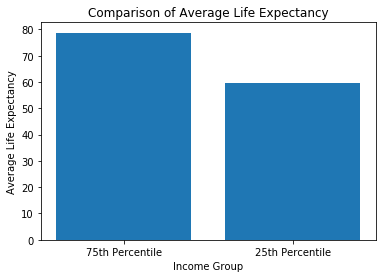

In [12]:
# Create new dataframes based on the percentiles for income
top_countries = combined_data.query('income_per_capita >= 21925.00')
bottom_countries = combined_data.query('income_per_capita <= 3310.00')

# Calculate the mean life expectancy of the two groups of countries
top_mean = top_countries['life_expectancy'].mean()
bottom_mean = bottom_countries['life_expectancy'].mean()

# Plot a simple bar chart of the two values
locations = [1, 2]
heights = [top_mean, bottom_mean]
labels = ['75th Percentile', '25th Percentile']
plt.bar(locations, heights, tick_label=labels)
plt.title('Comparison of Average Life Expectancy')
plt.xlabel('Income Group')
plt.ylabel('Average Life Expectancy');

### What countries had the longest life expectency and what is their income per capita?

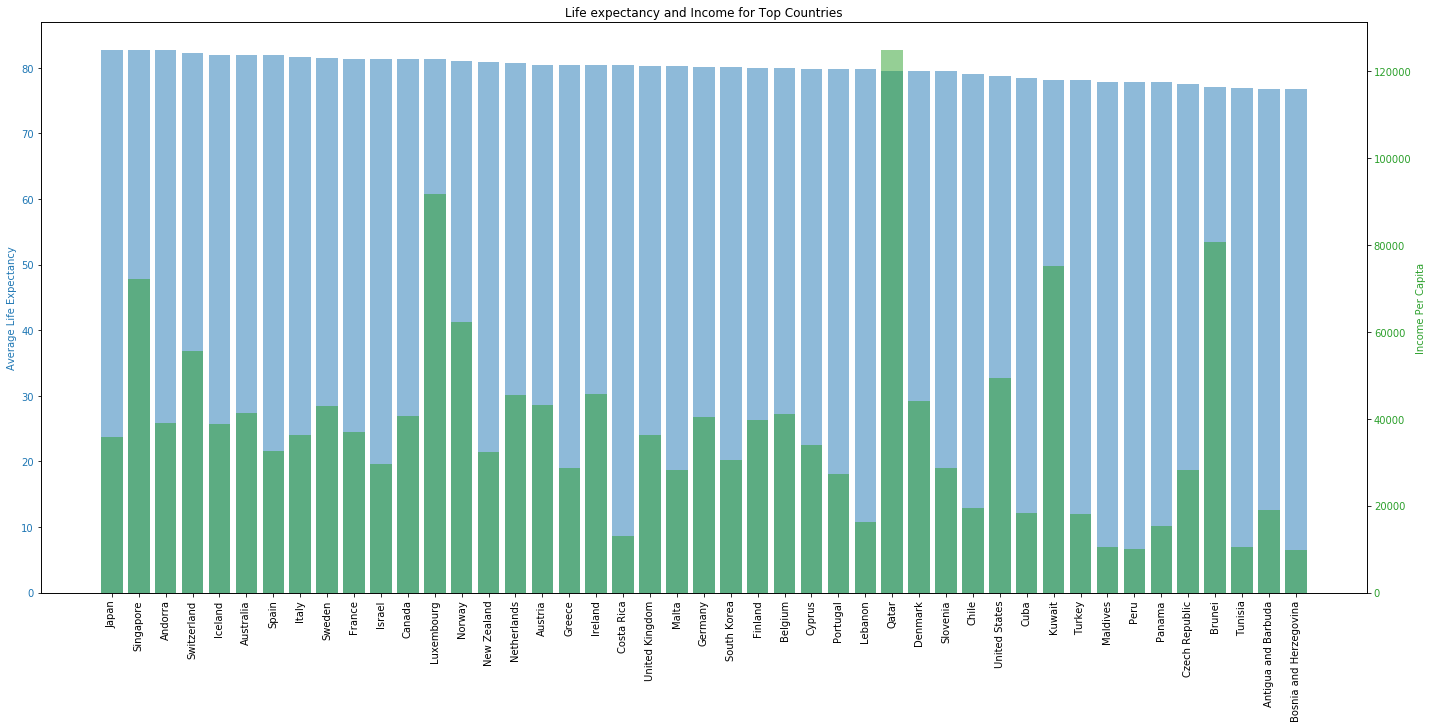

In [13]:
# Select the countries where the life expectancy was in the 75th percentile 
top_countries = combined_data.query('life_expectancy >= 76.725')

# Sort the life expectency in descending order
top_countries = top_countries.sort_values('life_expectancy', ascending=False)

# Use a bar chart to visualize the top countries
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:blue'
ax1.set_ylabel('Average Life Expectancy', color=color)
ax1.bar(top_countries['country'], top_countries['life_expectancy'], alpha=0.5, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Income Per Capita', color=color)
ax2.bar(top_countries['country'], top_countries['income_per_capita'], alpha=0.5, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Life expectancy and Income for Top Countries')
plt.show();

In [14]:
# Sort on income to see where the United States falls
top_countries = top_countries.sort_values('income_per_capita', ascending=False)
top_countries.head(10)

,country,life_expectancy,income_per_capita,total_health_expenditure,private_health_expenditure
133,Qatar,79.5,125000,2262.50,511.32500
97,Luxembourg,81.3,91700,7125.09,1111.51404
24,Brunei,77.1,80600,2289.04,345.64504
88,Kuwait,78.2,75200,1977.76,387.64096
144,Singapore,82.7,72100,2855.16,1818.73692
123,Norway,81.0,62300,5906.04,950.87244
159,Switzerland,82.2,55500,6382.50,2616.82500
175,United States,78.7,49400,8842.60,4147.17940
79,Ireland,80.4,45700,4199.83,1293.54764
118,Netherlands,80.7,45500,5414.50,736.37200


### What countries have the lowest life expectency and what is their income per capita?

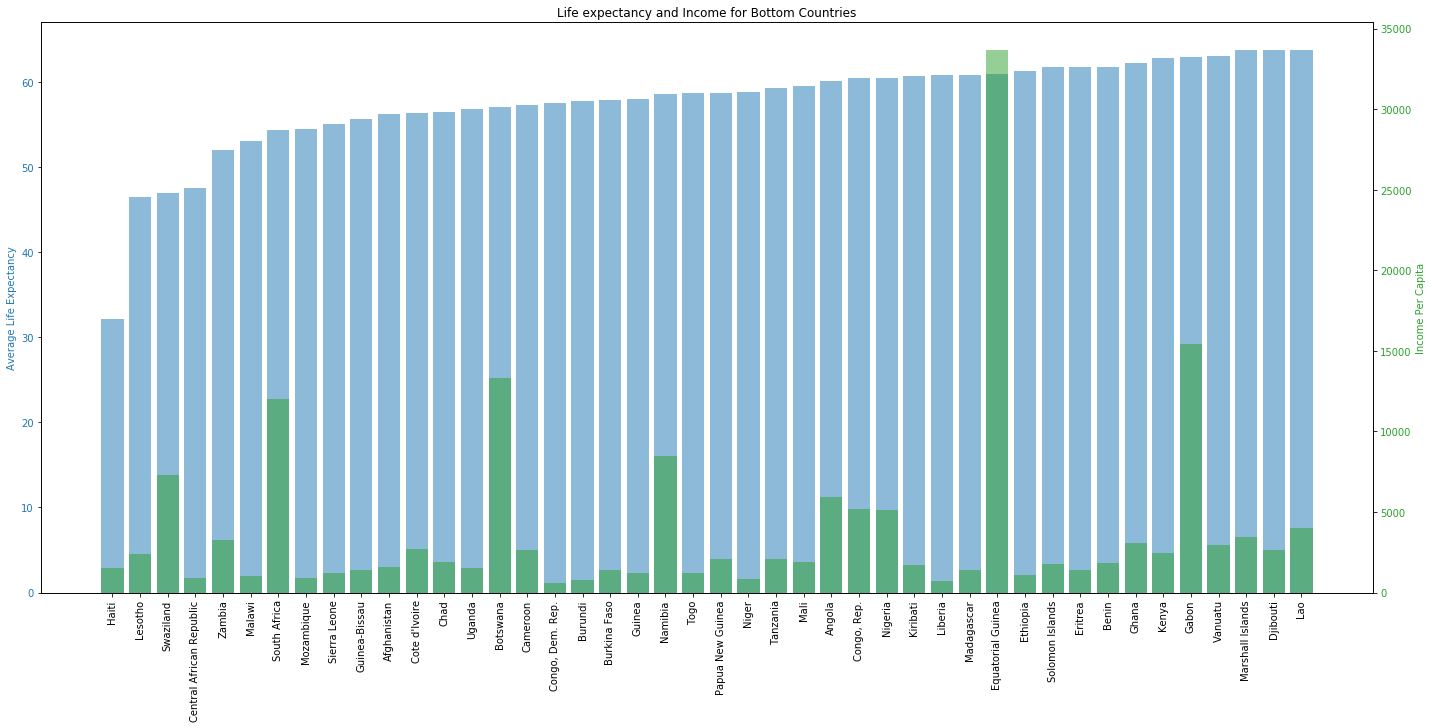

In [15]:
# Select the countries where the life expectancy is in the 25th percentile 
bottom_countries = combined_data.query('life_expectancy <= 63.95')

# Sort the life expectency in ascending order
bottom_countries = bottom_countries.sort_values('life_expectancy', ascending=True)

# Use a bar chart to visualize the bottom countries
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:blue'
ax1.set_ylabel('Average Life Expectancy', color=color)
ax1.bar(bottom_countries['country'], bottom_countries['life_expectancy'], alpha=0.5, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Income Per Capita', color=color)
ax2.bar(bottom_countries['country'], bottom_countries['income_per_capita'], alpha=0.5, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Life expectancy and Income for Bottom Countries')
plt.show();

### Does private health care spending effect life expectancy more than total health care spending?

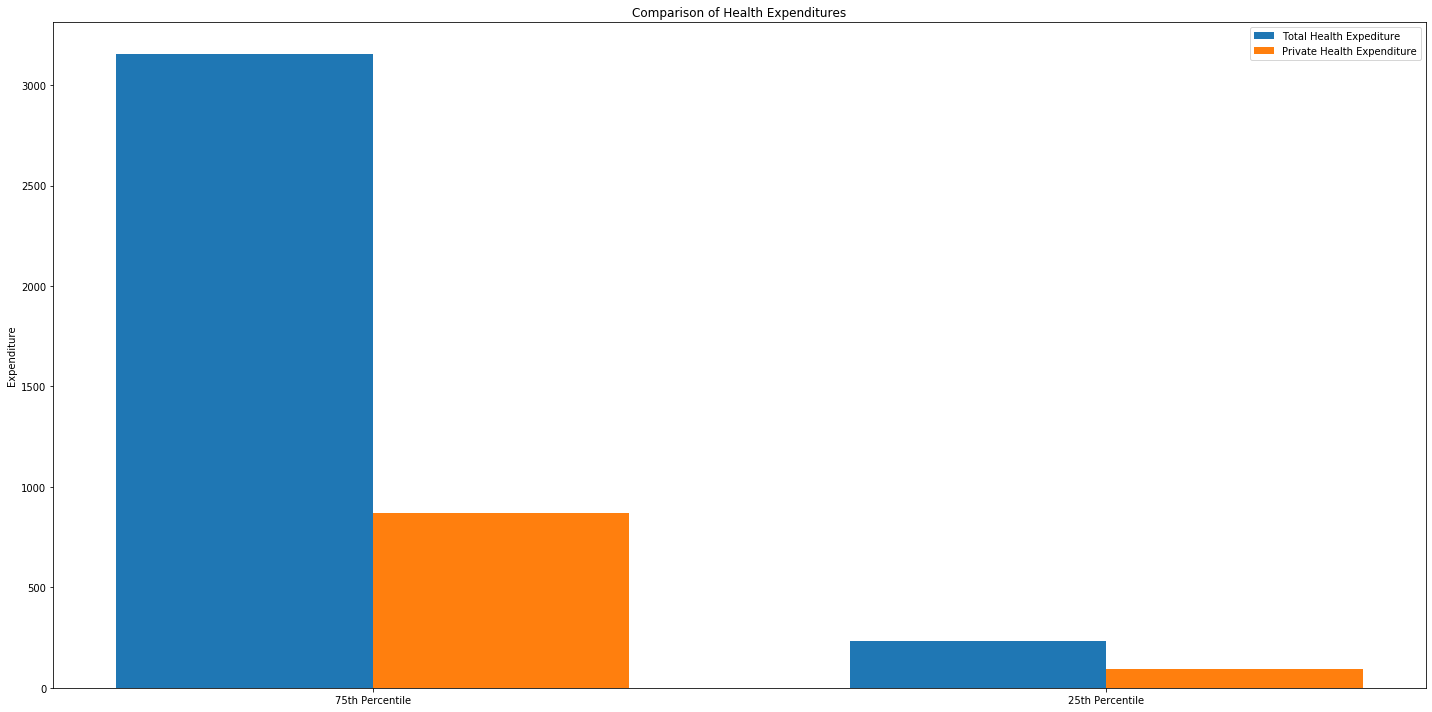

In [16]:
# Calculate the mean total and private health expenditures for the two groups of countries
top_mean_private = top_countries['private_health_expenditure'].mean()
bottom_mean_private = bottom_countries['private_health_expenditure'].mean()
top_mean_total = top_countries['total_health_expenditure'].mean()
bottom_mean_total = bottom_countries['total_health_expenditure'].mean()

# Plot a combo bar chart of the two values for the two groups
locations = [1, 2, 3, 4]
heights = [top_mean_total, top_mean_private, bottom_mean_total, bottom_mean_private]
labels = ['75th Percentile', '25th Percentile']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, [top_mean_total, bottom_mean_total], width, label='Total Health Expediture')
rects2 = ax.bar(x + width/2, [top_mean_private, bottom_mean_private], width, label='Private Health Expenditure')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Expenditure')
ax.set_title('Comparison of Health Expenditures')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

<a id='conclusions'></a>
## Conclusions

> Countries with more income per capita had longer life expectancy.

> Income per capita alone doesn't appear to determine life expectancy. The United States was in the top 10 for income per capita but didn't even crack the top 30 for life expectancy.

> Countries with longer life expectancy spent more overall on health care and considerably more through social programs than privately.

> More current data on health expenditures could change these results.